## Final Project

Project ini menggunakan dataset loan default. Tujuan dari project ini yaitu untuk membuat model machine learning untuk memprediksi apakah seorang pemohon pinjaman akan default atau tidak. Data yang digunakan diambil dari https://www.kaggle.com/datasets/yasserh/loan-default-dataset.

### Import Packages dan Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Loan_Default.csv")

### Exploratory Data Analysis

#### Dataset Explanation

In [3]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [4]:
df.shape

(148670, 34)

Dataset ini memiliki 34 kolom dan 148670 baris. Berikut ini merupakan penjelasan dari tiap kolom yang ada pada dataset ini.
- ID : tanda unik yang mengidentifikasi tiap pemohon 
- year : tahun pinjaman diberikan
- loan_limit : jumlah uang maksimal yang bisa dipinjam pemohon
- Gender : jenis kelamin pemohon
- approv_in_adv : apakah permohonan peminjam disetujui di awal (tanpa screening) atau tidak
- loan_type : Jenis pinjaman
- loan_purpose : alasan peminjam ingin meminjam uang
- Credit_Worthiness : Seberapa layak peminjam untuk menerima pinjaman baru,
- open_credit : pinjaman yang telah disetujui sebelumnya antara pemberi pinjaman dan peminjam. Ini memungkinkan peminjam untuk melakukan penarikan berulang hingga batas tertentu.
- business_or_commercial : Jenis penggunaan pinjaman.
- loan_amount : Jumlah pinjaman secara eksak.
- rate_of_interest : Jumlah yang dibebankan pemberi pinjaman kepada peminjam dan merupakan persentase dari pokok—jumlah yang dipinjamkan
- Interest_rate_spread : Selisih antara tingkat bunga yang dibayarkan lembaga keuangan kepada deposan dan tingkat bunga yang diterimanya dari pinjaman
- Upfront_charges : Biaya yang dibayarkan kepada pemberi pinjaman oleh peminjam sebagai pertimbangan untuk membuat pinjaman baru
- term : Jangka waktu pelunasan pinjaman
- Neg_ammortization : Mengacu pada situasi ketika peminjam pinjaman melakukan pembayaran kurang dari angsuran standar yang ditetapkan oleh bank
- Interest_only : jumlah bunga saja tanpa prinsip
- lump_sum_payment : Jumlah uang yang dibayarkan dalam satu kali pembayaran, bukan secara mencicil
- property_value : Nilai sekarang dari manfaat masa depan yang timbul dari kepemilikan properti
- construction_type : Jenis konstruksi agunan
- occupancy_type : klasifikasi mengacu pada pengkategorian struktur berdasarkan penggunaannya
- Secured_by : Jenis Jaminan
- total_units : jumlah unit
- income :mengacu pada jumlah uang, properti, dan transfer nilai lainnya yang diterima selama periode waktu tertentu
- credit_type : jenis kredit
- Credit_Score : ukuran kelayakan kredit
- co-applicant_credit_type : orang tambahan yang terlibat dalam proses aplikasi pinjaman. Baik pemohon dan pemohon bersama mengajukan dan menandatangani pinjaman
- age : umur pelamar
- submission_of_application : Pastikan aplikasi lengkap atau tidak
- LTV : nilai waktu hidup (LTV) adalah perkiraan laba bersih
- Region : tempat pemohon
- Security_Type :Jenis Jaminan
- Status : Status pinjaman (Disetujui/Ditolak)
- dtir1 : rasio utang terhadap pendapatan

Kolom `Status` menjadi kolom tujuan yang akan diprediksi (label).

#### Checking Data Types and Missing Values

Untuk langkah pertama, kita perlu mengecek apakah tiap kolom pada dataset memiliki tipe data yang benar, dan mengecek nilai yang dimiliki oleh tiap kolomnya.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


Terdapat kejanggalan pada tipe data kolom `total_units` dan `age` yang memiliki tipe data object, padahal total unit dan usia seharusnya bertipe data integer. Akan dilakukan pengecekan terhadap kolom-kolom tersebut.

In [7]:
df["total_units"].value_counts()

1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64

In [8]:
df["age"].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

Ternyata, kolom `total_units` dikelompokkan berdasarkan jumlah unitnya dan kolom `age` dikelompokkan berdasarkan range usia tertentu sehingga kedua kolom ini memiliki tipe data object. Nilai-nilai pada `total_units` akan diubah menjadi integer.

In [9]:
def tunit(x):
    if x=='1U':
        x=1
        return x
    elif x=='2U':
        x=2
        return x
    elif x=='3U':
        x=3
        return x
    else:
        x=4
        return x

In [10]:
df["total_units"] = df.apply(lambda x: tunit(x.total_units), axis = 1)

Kolom gender memiliki nilai 'Sex Not Available' yang sama dengan nilai NaN, maka dari itu nilai 'Sex Not Available akan diganti dengan NaN'

In [11]:
df["Gender"].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

In [12]:
def gender(x):
    if x=="Sex Not Available":
        x=np.nan
        return x
    else:
        return x

In [13]:
df["Gender"] = df.apply(lambda x: gender(x.Gender), axis = 1)

#### Handle Missing Values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     111011 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Dataset df memiliki banyak kolom yang memiliki nilai kosong (missing value), terutama di kolom `Gender`, `rate_of_interest`, `Interest_rate_spread`, dan juga `Upfront_charges`. Akan dilihat persebaran missing value ini berdasarkan `Status`nya.

In [15]:
df['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [16]:
df.Gender.isnull().groupby([df['Status']]).sum().astype(int)

Status
0    26892
1    10767
Name: Gender, dtype: int32

In [17]:
df.rate_of_interest.isnull().groupby([df['Status']]).sum().astype(int)

Status
0        0
1    36439
Name: rate_of_interest, dtype: int32

In [18]:
df.Interest_rate_spread.isnull().groupby([df['Status']]).sum().astype(int)

Status
0        0
1    36639
Name: Interest_rate_spread, dtype: int32

In [19]:
df.Upfront_charges.isnull().groupby([df['Status']]).sum().astype(int)

Status
0     3156
1    36486
Name: Upfront_charges, dtype: int32

Kolom `rate_of_interest`, `Interest_rate_spread`, dan `Upfront_charges` akan dihapus karena nilai kosong pada Status 1-nya sangat banyak.

In [20]:
df.drop(['rate_of_interest','Interest_rate_spread','Upfront_charges'], axis = 'columns', inplace = True)

Kolom `ID` tidak berpengaruh terhadap `Status`, begitu pula dengan kolom `year` karena hanya memiliki satu nilai yaitu 2019. Maka dari itu, kolom `ID` dan `year` akan dihapus.

In [21]:
df.drop(['ID','year'], axis = 'columns', inplace = True)

#### Data Visualization

Sebelum melakukan feature selection, kita perlu terlebih dahulu memahami tiap kolom untuk menentukan kolom mana yang akan digunakan sebagai prediktor. Berikut merupakan heatmap yang menunjukkan korelasi antar tiap kolom numerik.

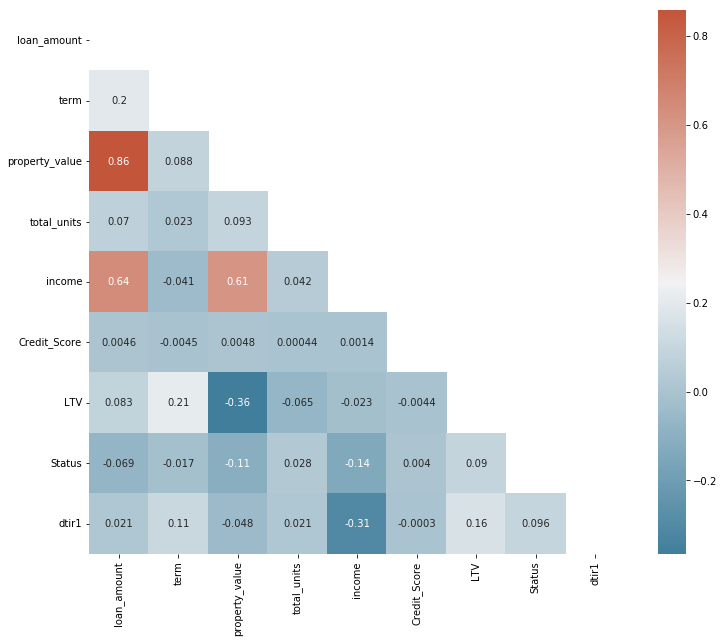

In [22]:
corr = df.corr('spearman')
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Dari heatmap di atas, bisa kita simpulkan bahwa `property_value` dan `loan_amount` memiliki korelasi yang tinggi. Sehingga jika salah satu dipilih menjadi prediktor, maka yang lainnya harus diserakan. Begitu pula kolom `income` dengan `loan_amount` dan kolom `income` dengan `property_value` memiliki korelasi yang cukup tinggi. Semakin tinggi property value-nya, semakin tinggi income dan juga loan amountnya, begitu pula sebaliknya.
Berikutnya akan dilihat hubungan antar kolom numerik dengan kolom `Status` dengan menggunakan scatterplot

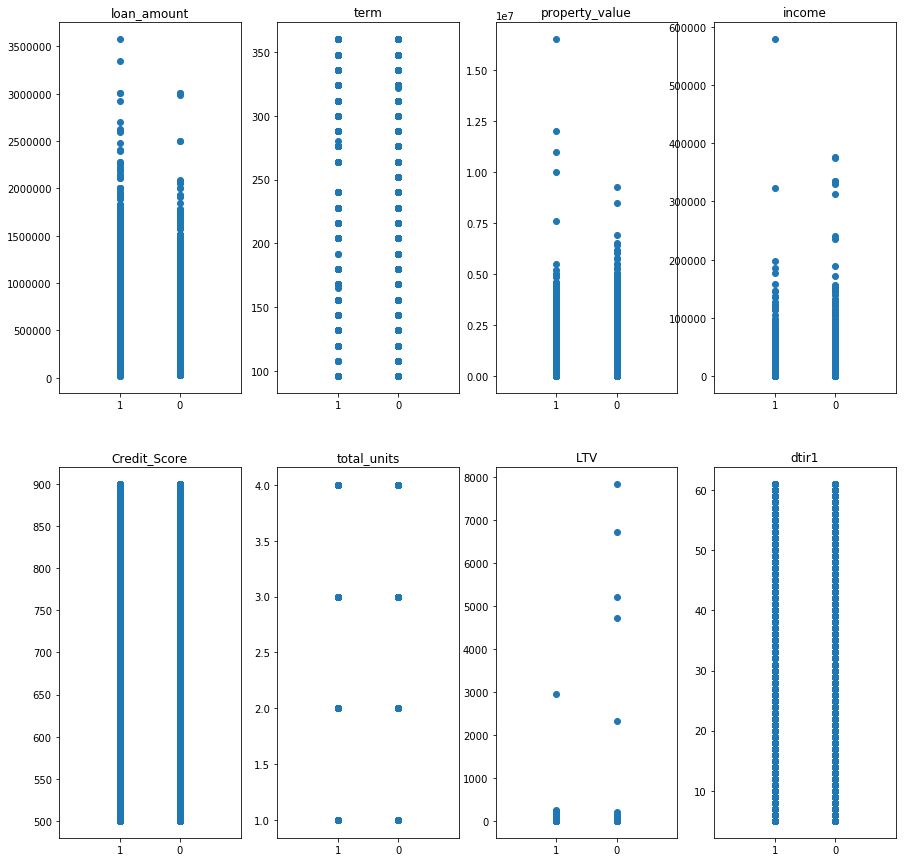

In [23]:
fig, axs = plt.subplots(2, 4,figsize=(15,15))

axs[0, 0].scatter(df["Status"].astype(str), df["loan_amount"])
axs[0, 0].margins(x=1)
axs[0, 0].set_title('loan_amount')

axs[0, 1].scatter(df["Status"].astype(str), df["term"])
axs[0, 1].margins(x=1)
axs[0, 1].set_title('term')

axs[0, 2].scatter(df["Status"].astype(str), df["property_value"])
axs[0, 2].margins(x=1)
axs[0, 2].set_title('property_value')

axs[0, 3].scatter(df["Status"].astype(str), df["income"])
axs[0, 3].margins(x=1)
axs[0, 3].set_title('income')

axs[1, 0].scatter(df["Status"].astype(str), df["Credit_Score"])
axs[1, 0].margins(x=1)
axs[1, 0].set_title('Credit_Score')

axs[1, 1].scatter(df["Status"].astype(str), df["total_units"])
axs[1, 1].margins(x=1)
axs[1, 1].set_title('total_units')

axs[1, 2].scatter(df["Status"].astype(str), df["LTV"])
axs[1, 2].margins(x=1)
axs[1, 2].set_title('LTV')

axs[1, 3].scatter(df["Status"].astype(str), df["dtir1"])
axs[1, 3].margins(x=1)
axs[1, 3].set_title('dtir1')

plt.show()

Dari visualisasi di atas, ternyata pinjaman yang statusnya diterima jumlah maksimalnya justru lebih tinggi dibandingkan dengan yang statusnya ditolak, begitu pula dengan jumlah minimalnya lebih rendah. Selain itu, `loan_amount` yang tinggi juga mengindikasikan bahwa si peminjam punya `income` yang lebih tinggi, begitu pula sebaliknya, ditunjukkan dengan `property_value` dan `income` yang memiliki korelasi yang cukup tinggi dengan `loan_amount`.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005978F28>,
      dtype=object)

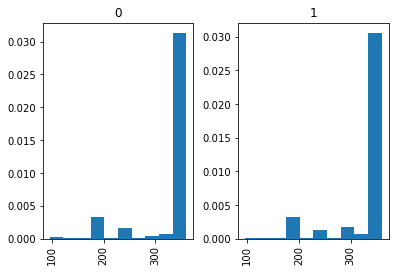

In [31]:
df['term'].hist(by=df['Status'],density=True)

Pada visualisasi di atas, terlihat bahwa baik di status 0 maupun 1, semakin panjang `term`-nya, semakin banyak aplikasi pinjamannya. Hal ini mungkin dikarenakan jangka waktu pinjaman yang panjang membuat pembayaran tiap bulannya lebih rendah.

In [34]:
df.groupby([('Status')])['total_units'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112031.0,1.018977,0.187050,1.0,1.0,1.0,1.0,4.0
1,36639.0,1.029941,0.229882,1.0,1.0,1.0,1.0,4.0


In [35]:
df.groupby([('Status')])['LTV'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112029.0,72.064757,41.768899,2.072943,59.970817,74.504405,85.201149,7831.25
1,21543.0,76.291468,28.580217,0.967478,64.273172,79.362416,90.948276,2956.25


In [36]:
df.groupby([('Status')])['Credit_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112031.0,699.523793,115.674510,500.0,599.0,699.0,800.0,900.0
1,36639.0,700.600344,116.487189,500.0,599.5,700.0,803.0,900.0


In [37]:
df.groupby([('Status')])['dtir1'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,104220.0,37.369267,10.027197,5.0,31.0,38.0,44.0,61.0
1,20329.0,39.597324,12.716828,5.0,32.0,42.0,49.0,61.0


Kolom `LTV` dan `total_units` juga tidak begitu berpengaruh terhadap `Status` sehingga kolom tersebut tidak akan dipakai sebagai prediktor. Terakhir, kolom `term`, `Credit_Score` dan `dtir1` memiliki rata-rata sedikit lebih tinggi pada pinjaman yang diterima. Berikut ditampilkan histogram `Credit_Score` dan `dtir1` berdasarkan statusnya.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D20EC50>,
      dtype=object)

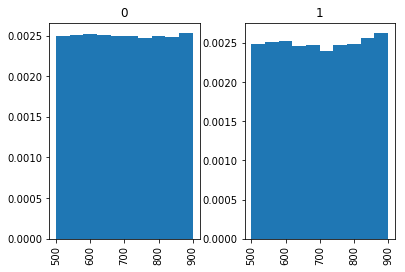

In [38]:
df['Credit_Score'].hist(by=df['Status'],density=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D8329E8>,
      dtype=object)

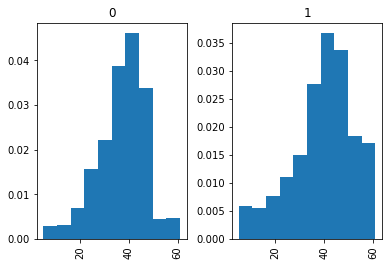

In [39]:
df['dtir1'].hist(by=df['Status'],density=True)

Pada histogram di atas dapat dilihat bahwa pada `credit_score` pada status 1 cenderung naik seiring bertambahnya score, hal ini karena `credit_score` dihasilkan dari riwayat yang menunjukkan kredibilitas si peminjam. Pada kolom `dtr1`, range 40-60 pada status 1 lebih banyak presentasenya dibandingkan dengan status 0. Yang berarti semakin tinggi `dtir`, kemungkinan peminjam untuk mendapat pinjaman lebih tinggi.

In [40]:
df.drop(['LTV','total_units'], axis = 'columns', inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     111011 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   term                       148629 non-null  float64
 10  Neg_ammortization          148549 non-null  object 
 11  interest_only              148670 non-null  object 
 12  lump_sum_payment           148670 non-null  object 
 13  property_value             13

In [42]:
df['property_value'] = df['property_value'].fillna(df['property_value'].mean())
df['income'] = df['income'].fillna(df['income'].mean())

Selanjutnya akan dipilih kolom-kolom categorical yang akan menjadi feature dengan menggunakan barplot.

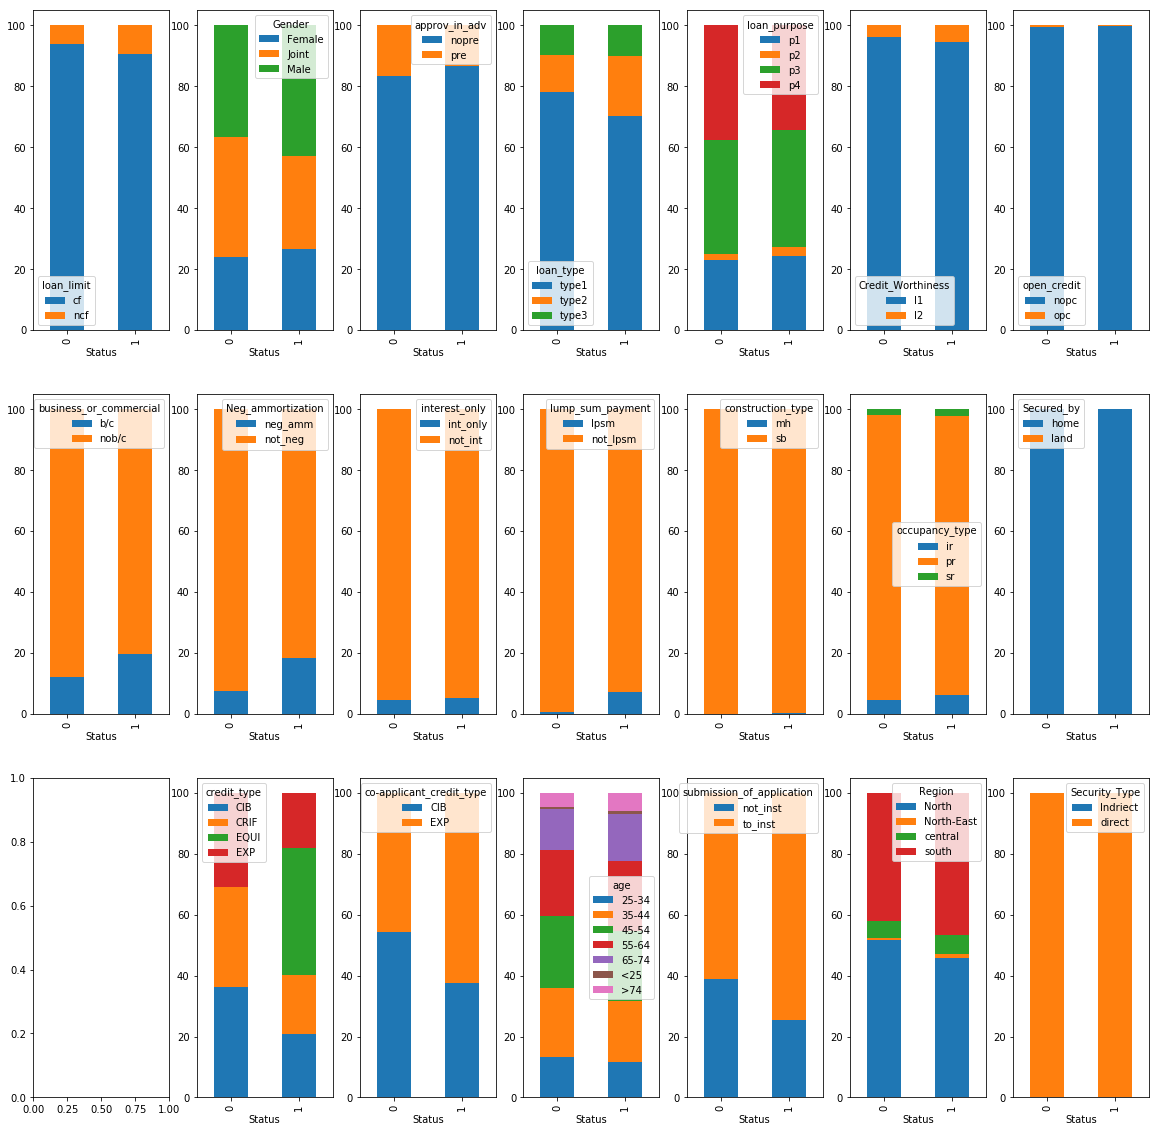

In [36]:
fig, axs = plt.subplots(3,7,figsize=(20,20))

pd.crosstab(df['Status'], df['loan_limit']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][0],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['Gender']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][1],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['approv_in_adv']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][2],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['loan_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][3],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['loan_purpose']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][4],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['Credit_Worthiness']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][5],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['open_credit']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][6],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['business_or_commercial']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][0],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['Neg_ammortization']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][1],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['interest_only']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][2],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['lump_sum_payment']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][3],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['construction_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][4],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['occupancy_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][5],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['Secured_by']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][6],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['credit_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][1],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['co-applicant_credit_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][2],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['age']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][3],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['submission_of_application']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][4],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['Region']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][5],kind = 'bar', stacked = True)
pd.crosstab(df['Status'], df['Security_Type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][6],kind = 'bar', stacked = True)

Pada barplot di atas dapat dilihat dengan jelas bahwa kolom `open_credit`, `interest_only`, `construction_type`, `occupancy_type`, `Secured_by`, `credit_type`, `co-applicant_credit_type`, `region`, dan `Security_Type` tidak memiliki perbedaan jumlah yang signifikan antara pinjaman yang diterima dan tidak. Maka dari itu, kolom-kolom tersebut akan dihapus dan tidak digunakan sebagai prediktor. Begitu pula dengan kolom `lump_sum_payment`, `Neg_ammortization`, `business_or_commercial`, `loan_purpose`, `approv_in_adv`, `Gender`, `loan_limit`, `Credit_Worthiness`, dan `submission_of_application` tidak memiliki pengaruh yang signifikan terhadap kolom `Status`.

In [43]:
df.drop(['open_credit','interest_only','construction_type','occupancy_type','Secured_by','credit_type','Region','Security_Type','co-applicant_credit_type'], axis = 'columns', inplace = True)

In [44]:
df.drop(['lump_sum_payment','Neg_ammortization','business_or_commercial','loan_purpose','approv_in_adv','Gender','loan_limit','Credit_Worthiness','submission_of_application'], axis = 'columns', inplace = True)

In [38]:
pd.crosstab(df['Status'], df['age']).apply(lambda x: x*100/x.sum(), axis = 1)

age,25-34,35-44,45-54,55-64,65-74,<25,>74
Status,,,,,,,
0,13.294535,22.769591,23.539020,21.522614,13.543573,0.847980,4.482688
1,11.657839,20.058179,22.912264,23.112599,15.288564,1.062049,5.908505


Pada kolom `age` dapat dilihat bahwa peminjam dengan usia dibawah 54 cenderung lebih banyak ditolak dibandingkan dengan peminjam diatas usia 54.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_type       148670 non-null  object 
 1   loan_amount     148670 non-null  int64  
 2   term            148629 non-null  float64
 3   property_value  148670 non-null  float64
 4   income          148670 non-null  float64
 5   Credit_Score    148670 non-null  int64  
 6   age             148470 non-null  object 
 7   Status          148670 non-null  int64  
 8   dtir1           124549 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 10.2+ MB


In [46]:
df2 = df

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_type       148670 non-null  object 
 1   loan_amount     148670 non-null  int64  
 2   term            148629 non-null  float64
 3   property_value  148670 non-null  float64
 4   income          148670 non-null  float64
 5   Credit_Score    148670 non-null  int64  
 6   age             148470 non-null  object 
 7   Status          148670 non-null  int64  
 8   dtir1           124549 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 10.2+ MB


In [48]:
df2['dtir1'] = df2['dtir1'].fillna(df2['dtir1'].mean())
df2['term'] = df2['term'].fillna(df2['term'].mean())

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_type       148670 non-null  object 
 1   loan_amount     148670 non-null  int64  
 2   term            148670 non-null  float64
 3   property_value  148670 non-null  float64
 4   income          148670 non-null  float64
 5   Credit_Score    148670 non-null  int64  
 6   age             148470 non-null  object 
 7   Status          148670 non-null  int64  
 8   dtir1           148670 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 10.2+ MB


Feature yang digunakan adalah `loan_type`, `loan_amount`, `term`, `property_value`, `income`, `Credit_Score`, `age`, dan `dtir1`.

In [35]:
df2['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

Kolom `status` memiliki data yang tidak seimbang. Oleh karena itu, akan dilakukan resampling terlebih dahulu.

### One Hot Encoding

Sebelum melakukan one-hot encoding, akn dilakukan resampling data terlebih dahulu karena terdapat perbedaan banyaknya data yang disetujui dan ditolak pada kolom `Status`.

In [51]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df2[(df2['Status']==0)] 
df_minority = df2[(df2['Status']==1)] 
# upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples=36639, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [52]:
df_downsampled['Status'].value_counts()

1    36639
0    36639
Name: Status, dtype: int64

In [53]:
df_final = pd.get_dummies(df_downsampled)
df_final.head()

,loan_amount,term,property_value,income,Credit_Score,Status,dtir1,loan_type_type1,loan_type_type2,loan_type_type3,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
20907,256500,360.0,268000.0,6957.338876,565,0,37.732932,0,1,0,0,0,0,0,0,1,0
1156,216500,240.0,338000.0,7500.000000,619,0,9.000000,1,0,0,0,1,0,0,0,0,0
137562,146500,360.0,178000.0,4200.000000,603,0,48.000000,0,1,0,0,0,1,0,0,0,0
146313,586500,360.0,728000.0,6780.000000,530,0,55.000000,0,1,0,0,0,0,1,0,0,0
101844,166500,360.0,178000.0,4500.000000,725,0,36.000000,1,0,0,0,0,1,0,0,0,0


In [55]:
df_final['Status'].value_counts()

1    36639
0    36639
Name: Status, dtype: int64

### Random Forest

In [58]:
X = df_final.loc[:, df_final.columns != 'Status']
y = df_final["Status"]

In [59]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [60]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

### Hyperparameter Tuning

In [61]:
#Hyperparameter Tuning
#Mendefinisikan RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [62]:
#Mendefinisikan hyperparameter
params = {
    'max_depth': list(range(2,20)),
    'min_samples_leaf': list(range(1,50)),
    'n_estimators': list(range(100,200,10))
}

In [63]:
#random search untuk mencari hyperparameter terbaik
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           n_iter=100,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

random_search.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:618: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:428: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          r

In [65]:
random_search.best_score_

0.7773961697675477

In [66]:
#train model dengan menggunakan hyperparameter hasil random search 
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:482: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [67]:
#hasil sebelum hyperparameter tuning
y_classifier_rf = classifier_rf.predict(X_test)
#hasil sesudah hyperparameter tuning
y_rf = rf_best.predict(X_test)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

In [68]:
#Evaluasi model menggunakan AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_classifier_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.7814580235987425
0.7635607160248983


In [69]:
#Evaluasi Model menggunakan classification report
from sklearn.metrics import classification_report
#print(classification_report(y_test, y_rf))
print(classification_report(y_test, y_classifier_rf))

             precision    recall  f1-score   support

          0       0.71      0.90      0.79     14754
          1       0.86      0.63      0.73     14558

avg / total       0.78      0.76      0.76     29312



In [70]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_classifier_rf))
print(accuracy_score(y_test, y_rf))

0.7644650655021834
0.7824099344978166


### Kesimpulan
- Classification model yang kami gunakan pada model ini menggunakan metode random forest dengan akurasi 76.44%. Kami melakukan hyperparameter tuning untuk melakukan improvement terhadap model awal, diperoleh akurasi model akhir adalah 78.24%. Masalah imbalanced problem sudah kami atasi dengan resample dataset sehingga data yang digunakan untuk train dan test model seimbang.
- Feature-feature penting yang memengaruhi disetujui atau tidaknya suatu permohonan pinjaman adalah `loan_type`, `loan_amount`, `term`, `property_value`, `income`, `Credit_Score`, `age`, dan `dtir1`. Peminjam pada usia>55 tahun lebih banyak diterima dibandingkan dengan peminjam pada usia<55 tahun. `loan_type` dan `loan_amount` berpengaruh dimana loan_type type 2 lebih banyak disetujui.
- Perusahaan sebaiknya memperhatikan tipe loan yang diberikan. Jika tipe loan memengaruhi default atau tidaknya suatu pinjaman, maka seharusnya terdapat kriteria siapa saja yang dapat memilih tipe loan tersebut.